***

# R2.07
## TP3. Distances, diamètre, rayon, excentricité.

***
***

Dans le début du TP, les graphes seront orientés.

Le but de ce TP est d'implémenter l'algorithme de Floyd-Warshall, puis de l'utiliser pour définir une mesure importante sur les sommets, l'excentricité, puis d'illustrer cette notion.


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

Quelques matrices d'exemple

In [4]:



WCM=np.array([
	[0, np.inf, np.inf, np.inf,np.inf, 3],
	[np.inf, 0, 15, 1, np.inf, np.inf],
	[np.inf, np.inf, 0, 16, np.inf, np.inf],
    [-2, np.inf, np.inf, 0, 2, np.inf],
    [0, np.inf, np.inf, np.inf, 0, np.inf],
    [np.inf, 9, 11, np.inf, 19, 0]
])



On se donne quelques fonctions utiles pour la suite, prendre le temps de les comprendre (notamment les choix implicites).

In [5]:


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A = np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j] == np.inf:
                A[i][j] = 0
            else :
                if W[i][j] == 0:
                    if i != j:
                        A[i][j] = 1
                        print("Warning: a weight is equal to 0")
                    else:
                        if loop :
                            A[i][j] = 1
                        else :
                            A[i][j] = 0


                else :
                    A[i][j] = 1

    return A

def ToWeight(A):
    """
    Converts an  adjacency matrix to the corresponding weight matrix
    
    :param A: adjacency matrix
    :type A: two dimensionnal numpy array
    :return:  weight matrix 
    :rtype: two dimensionnal numpy array
    
    """
    n = A.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if A[i][j] == 0:
                W[i][j] = np.inf
            else :
                W[i][j] = 1
    return W

print(WCM)
A = ToAdj(WCM)

print(A)



[[ 0. inf inf inf inf  3.]
 [inf  0. 15.  1. inf inf]
 [inf inf  0. 16. inf inf]
 [-2. inf inf  0.  2. inf]
 [ 0. inf inf inf  0. inf]
 [inf  9. 11. inf 19.  0.]]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0.]]


On peut dessiner notre graphe avec les poids : 

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0.]]


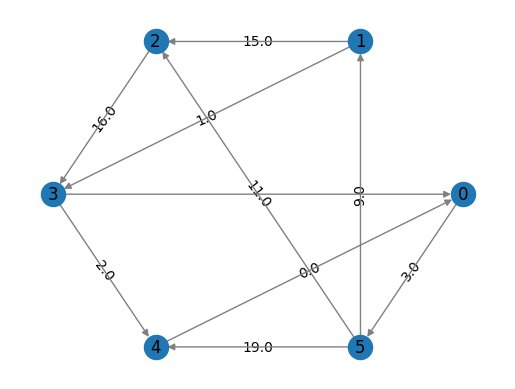

In [8]:
A=ToAdj(WCM)

print(A)

G=nx.from_numpy_array(A,create_using=nx.DiGraph())

edges = G.edges()

for u,v in G.edges():
    G[u][v]['weight'] = WCM[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.circular_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)


**Question 1** Écrire une fonction calculant la matrice des plus courts chemins dans un graphe (donné par sa matrice de pondération), selon l'algorithe de Floyd-Warshall dont on rappelle la structure :


<div class= 'alert alert-block alert-info'>
<tt>    
  
    
<b>
Floyd–Warshall algorithm's pseudo-code (taken from wikipedia)    
</b> 

    
    
      function FloydWarshall_shortestpath(W):
    
        D=W 
        for k:=1 to n

            for i:=1 to n

                for j:=1 to n


                    D[i][j]:=min(D[i][j],D[i][k]+D[k][j])

                end for

            end for

        end for

     return D

</tt>    


</div>



In [9]:
def FloydWarshall(W):
    """
    Floyd--Warshall algorithm

    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: the  matrix of shortest path
    :rtype: two dimensionnal numpy array
    """        
      
    n=W.shape[0]
    D=np.copy(W)
    
    for k in range(n):
        D[k][k] = 0
        for i in range(n):
            for j in range(n):
                D[i][j] = min(D[i][j], D[i][k] + D[k][j])

    return D

WCM2=np.array([
 [np.inf, np.inf, 1, np.inf],
 [-1, np.inf, -2, np.inf],
 [np.inf, np.inf, np.inf, 3],
 [np.inf, np.inf, np.inf, np.inf]])

FloydWarshall(WCM2)



array([[ 0., inf,  1.,  4.],
       [-1.,  0., -2.,  1.],
       [inf, inf,  0.,  3.],
       [inf, inf, inf,  0.]])


**To Do:**

**_question 2_**
Ajouter un garde-fou detectant la présence de cycles de poids négatifs (se reporter au cours)


In [10]:
def FloydWarshall2(W):
    """
    Floyd--Warshall algorithm

    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: the  matrix of shortest path
    :rtype: two dimensionnal numpy array
    """        
      
    n = W.shape[0]
    D = np.copy(W)
    
    for k in range(n):
        D[k][k] = 0
        for i in range(n):
            for j in range(n):
                D[i][j] = min(D[i][j], D[i][k] + D[k][j])
            if D[i][i] < 0:
                print("erreur : cycle")
                return -2

    return D

WCM3=np.array([
 [np.inf, np.inf, 1, np.inf],
 [-1, -8, -2, np.inf],
 [np.inf, np.inf, np.inf, 3],
 [np.inf, np.inf, np.inf, np.inf]])

FloydWarshall2(WCM3)

erreur : cycle


-2



***

***



# Diamètre, rayon, excentricité



On donne maintenant quelques notions _pour les graphes non-orientés_


L'**excentricité** d'un sommet est la distance maximale de ce sommet aux autres sommets du graphes.

$\xi(i) =  \max_j d_G(i,j) $


Le **_diamètre_** d'un graphe est le maximum des excentricité

$\delta = \max_i \max_j d_G(i,j) $

Le **_rayon_** d'un graphe est le minimum des excentricité


$\rho = \min_i \max_j d_G(i,j) $

**Question 3**

Comment calculer le rayon et le diamètre à partir de la matrice de valuation (on pourra utiliser les algorithmes vus plus tôt) ?

Montrer que le rayon vaut au plus deux fois le diamètre ($\rho(G) \leq \delta(G) \leq 2\rho(G)$) **dans un graphe non-orienté**. Donner des exemples où $\rho(G) = \delta(G)$ et d'autres où $ \delta(G) = 2\rho(G)$

Que peut-on dire dans le cas d'un graphe orienté ? Quelle définition pose problème dans le cas orienté ?

Pour calculer le rayon et le diamètre d'un graphe non-orienté à partir de la matrice de valuation, on peut utiliser l'algorithme de Floyd-Warshall pour calculer la matrice de distances entre tous les sommets. Ensuite, pour chaque sommet, on calcule son excentricité en prenant la distance maximale entre ce sommet et tous les autres sommets. Le rayon du graphe est le minimum de ces excentricités, tandis que le diamètre est le maximum de ces excentricités.

Soit G un graphe non-orienté et soit u un sommet arbitraire de G. Considérons les deux sommets les plus éloignés de u, soit v et w. Alors, la distance entre v et w est au moins égale à la distance entre u et v plus la distance entre u et w. Mathématiquement, d(v, w) >= d(u, v) + d(u, w)
Cela signifie que le diamètre 𝛿(G) du graphe est supérieur ou égal à la distance maximale de u aux autres sommets, c'est à dire l'excentricité 𝜉(u). Puisque u est arbitraire, on peut en conclure que 𝛿(G) >= 𝜌(G).

Maintenant, considérons un sommet u pour lequel l'excentricité 𝜉(u) est minimale. Soit v un sommet de G tel que d(u, v) = 𝜌(G). Alors, pour tout sommet w de G, nous avons : d(u, w) <= d(u, v) + d(v, w)   (inégalité triangulaire)
Cela implique que 𝜉(u) <= d(u, v) + 𝜉(v). Puisque 𝜉(u) est minimale et que v est arbitraire, on peut en conclure que 𝜌(G) <= 2𝛿(G).
Ainsi, nous avons montré que 𝜌(G) <= 𝛿(G) <= 2𝜌(G) pour tout graphe non-orienté G. Cette inégalité peut être stricte dans certains cas. Par exemple, dans un graphe complet, nous avons 𝜌(G) = 𝛿(G). D'autre part, dans le graphe biparti complet K_{n, n}, nous avons 𝛿(G) = 2𝜌(G) = n.

Dans le cas d'un graphe orienté, la définition d'excentricité est différente et pose problème pour l'établissement d'une inégalité similaire. En effet, l'excentricité d'un sommet est alors définie comme la distance maximale de ce sommet à un autre sommet, mais cette distance est calculée en prenant en compte le sens des arcs.

Ainsi, pour un graphe orienté, il n'est pas possible d'établir une inégalité du type 𝜌(𝐺)≤𝛿(𝐺)≤2𝜌(𝐺). Il est cependant possible de définir des notions de diamètre et de rayon pour un graphe orienté en considérant des notions d'excentricité similaires, mais il n'y a pas de lien général entre ces deux grandeurs.

In [11]:
B=np.array(
[[0,1,0,0,0], 
[1,0,1,1,0], 
[0,1,0,1,0], 
[0,1,1,0,1],
[0,0,0,1,0]])


WB=ToWeight(B)


def Diam_Rad(W):
    '''
    Calcule le diamètre et le rayon d'un graphe (peut-être infini)
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: excentricity, diameter, and radius
    :rtype: np array of float, two float (or np.inf) (or error if negatively weighted cycle)
    '''

    D = FloydWarshall2(W)
    if np.any(D < 0):
        return np.array([]), np.nan, np.nan, "Graph contains negative weight cycle"
    else:
        excentricity = np.amax(D, axis=1)
        diameter = np.amax(excentricity)
        radius = np.amin(excentricity)
        return excentricity, diameter, radius

Diam_Rad(WB)


(array([3., 2., 2., 2., 3.]), 3.0, 2.0)

**Question 4** 
Dessiner le graphe de manière à illustrer l'excentricité des sommets.

In [12]:
def ErdosRenly(n,p):
    """
     Renvoie la matrice d'adjacence d'un graphe d'Erdös-Renly

    :param n: nombre de sommets
    :type n:  int
    :param p: probabilité d'arête
    :type p:  float entre 0 et 1    
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """

    A=np.zeros((n,n),int)
    
    ki=0 #current connected component
    for i in range(n):
        for j in range(i):
            A[i][j]=np.random.binomial(1,p)
            A[j][i]=A[i][j]       
    return A


#SBM homebrew

def SBM_homebrew(array,pin,pout):
    """
     Renvoie la matrice d'adjacence d'un SBM

    :param array: tailles des différentes communautés
    :type array:  array of int
    :param pin: probabilité d'arête à l'intérieur d'une communauté
    :type pin:  float entre 0 et 1    
    :param pout: probabilité d'arête entre deux communautés
    :type pout:  float entre 0 et 1       
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """
    n=np.sum(array)
    ncum=np.cumsum(array)
    
    print(n)
    A=np.zeros((n,n),int)
    print(ncum)
    
    ki=0 #current connected component
    for i in range(n):
        if i>=ncum[ki]:
            ki=ki+1
            #print("i,ki",i,ki)
        kj=ki #current connected component
        for j in range(i+1,n):
            if j>=ncum[kj]:
                kj=kj+1
                #print("i,ki,j,kj",i,ki,j,kj)
               
            if ki==kj:
                A[i][j]=np.random.binomial(1,pin)
                A[j][i]=A[i][j]
            else:
                A[i][j]=np.random.binomial(1,pout)
                A[j][i]=A[i][j]          
    return A

ASBM=SBM_homebrew([10,15,20], 0.5, 0.02)

GSBM=nx.from_numpy_array(ASBM)


45
[10 25 45]


tada [3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 2. 3. 3.
 3.]


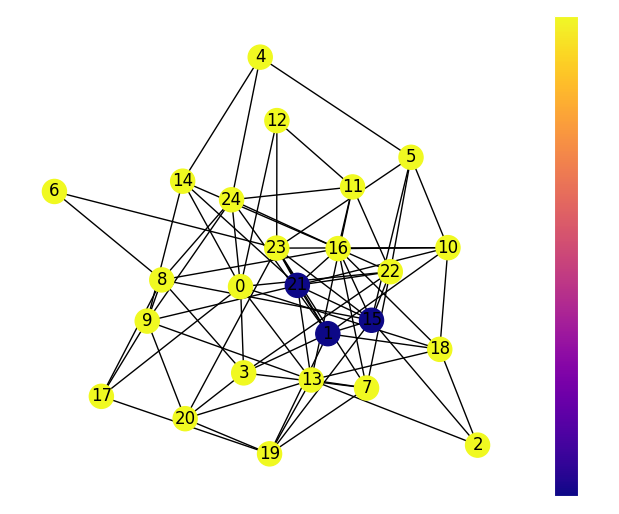

In [14]:

cmap = plt.cm.plasma
ER=ErdosRenly(25, 0.25)

GER=nx.from_numpy_array(ER)

WER=ToWeight(ER)

excent=Diam_Rad(WER)[0]

print("tada",excent)
nx.draw(GER, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GER))

#scale
vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()


45
[10 25 45]


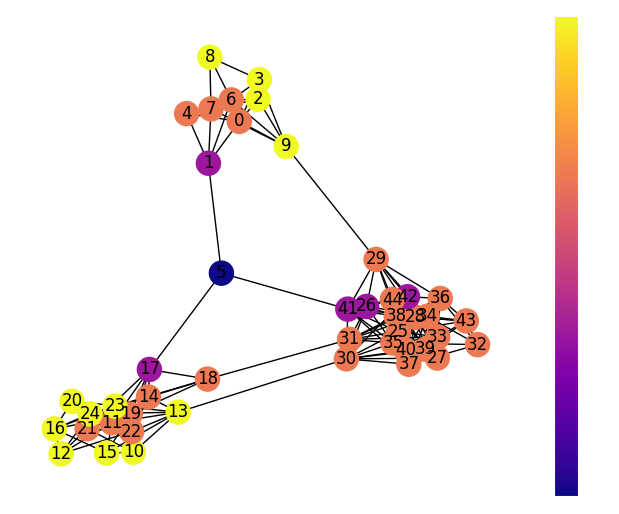

In [15]:
ASBM=SBM_homebrew([10,15,20], 0.4, 0.01)

GSBM=nx.from_numpy_array(ASBM)

WSBM=ToWeight(ASBM)

excent=Diam_Rad(WSBM)[0]





nx.draw(GSBM, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GSBM))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

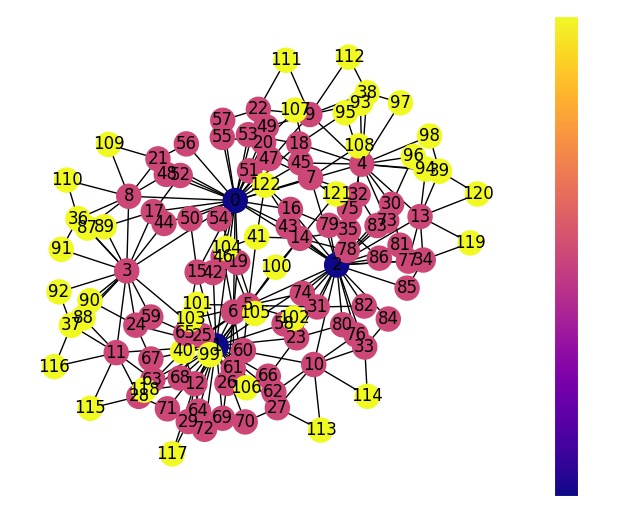

In [16]:
GDGM=nx.generators.classic.dorogovtsev_goltsev_mendes_graph(5)

ADGM=nx.to_numpy_array(GDGM)

WDGM=ToWeight(ADGM)

excent=Diam_Rad(WDGM)[0]





nx.draw(GDGM, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GDGM))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

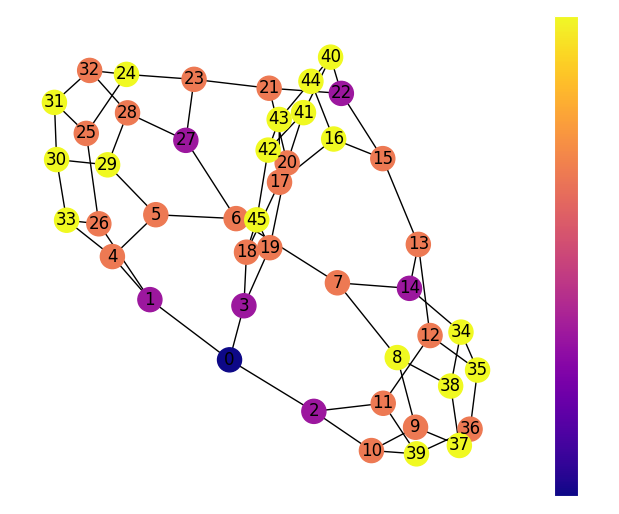

In [17]:
GT=nx.generators.small.tutte_graph()

AT=nx.to_numpy_array(GT)

WT=ToWeight(AT)

excent=Diam_Rad(WT)[0]





nx.draw(GT, nodelist=range(len(excent)),node_color=excent,with_labels=True,cmap=cmap,pos=nx.spring_layout(GT))


vmin=np.min(excent)
vmax=np.max(excent)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()